In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
data_dir = './cifar10_dataset'

In [ ]:
data_path = tf.keras.utils.get_file(origin=url, fname='cifar-10-python.tar.gz', untar=True, cache_dir='./')


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
data_path = tf.keras.utils.get_file(origin=url, fname='cifar-10-python.tar.gz', untar=True, cache_dir='./')


In [ ]:
import shutil
shutil.move('cifar-10-batches-py', data_dir)


In [ ]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()


In [ ]:
x_train.shape

In [ ]:

y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

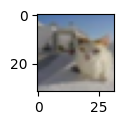

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(x_train[80])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define the base CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

In [ ]:
# Train the base CNN on the dataset
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")


In [ ]:

from tensorflow.keras.layers import LeakyReLU, PReLU, Activation, BatchNormalization

# Define the activation functions
leaky_relu = LeakyReLU(alpha=0.1)  # Leaky ReLU with slope 0.1
prelu = PReLU()                    # Parametric ReLU
sigmoid = Activation('sigmoid')    # Sigmoid activation
tanh = Activation('tanh')          # Tanh activation


In [ ]:
# Replace activation function in some convolutional layers
model_with_leaky_relu = Sequential([
    Conv2D(32, (3, 3), activation=leaky_relu, input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation=leaky_relu),
    Flatten(),
    Dense(128, activation=leaky_relu),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Define the model architecture with PReLU activation
model_with_prelu = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    prelu,
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    prelu,
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    prelu,
    Flatten(),
    Dense(128),
    BatchNormalization(),
    prelu,
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model_with_sigmoid = Sequential([
    Conv2D(32, (3, 3), activation=sigmoid, input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation=sigmoid),
    Flatten(),
    Dense(128, activation=sigmoid),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_with_tanh = Sequential([
    Conv2D(32, (3, 3), activation=tanh, input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation=tanh),
    Flatten(),
    Dense(128, activation=tanh),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile and train the models with different activation functions
models = [model_with_leaky_relu, model_with_sigmoid, model_with_tanh]
activation_names = ['LeakyReLU','PReLU''Sigmoid', 'Tanh']

for model, activation_name in zip(models, activation_names):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"{activation_name} - Test accuracy: {test_acc}")

In [ ]:
from tensorflow.keras.layers import Conv2D

# Define different convolutional layer configurations
configurations = [

    [32, (3, 3), (1, 1)],

    [64, (3, 3), (2, 2)],

    [128, (5, 5), (1, 1)],

]

# Iterate through different configurations
for i, config in enumerate(configurations):
    num_filters, kernel_size, strides = config

    model = Sequential([
        Conv2D(num_filters, kernel_size, strides=strides, activation='relu', input_shape=(32, 32, 3)),
        # Add more layers (e.g., pooling, fully connected) as needed
    ])

    # Compile and train the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Configuration {i + 1} - Test accuracy: {test_acc}")


In [ ]:
from tensorflow.keras.layers import Conv2D

# Define different convolutional layer configurations
configurations = [
    # Configuration 1
    [32, (3, 3), (1, 1)],
    # Configuration 2
    [64, (3, 3), (2, 2)],
    # Configuration 3
    [128, (5, 5), (1, 1)],
    # Add more configurations as needed
]

# Iterate through different configurations
for i, config in enumerate(configurations):
    num_filters, kernel_size, strides = config

    model = Sequential([
        Conv2D(num_filters, kernel_size, strides=strides, activation='relu', input_shape=(32, 32, 3)),
        # Add more layers (e.g., pooling, fully connected) as needed
    ])

    # Compile and train the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Configuration {i + 1} - Test accuracy: {test_acc}")


In [ ]:
from sklearn.metrics import classification_report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Evaluate the performance of each CNN model based on accuracy, precision, recall, and F1-score
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Assuming you have already trained models (model_with_leaky_relu, model_with_prelu, etc.)
models = [model_with_leaky_relu, model_with_sigmoid, model_with_tanh]
activation_names = ['LeakyReLU', 'Sigmoid', 'Tanh']

for model, activation_name in zip(models, activation_names):
    print(f"Performance Evaluation for {activation_name}:")
    evaluate_model(model, x_test, y_test)
    print("=" * 60)


In [ ]:
from sklearn.metrics import classification_report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Evaluate the performance of each CNN model based on accuracy, precision, recall, and F1-score
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Assuming you have already trained models (model_with_leaky_relu, model_with_prelu, etc.)
models = [model_with_leaky_relu,model_with_sigmoid, model_with_tanh]
activation_names = ['LeakyReLU', 'PReLU', 'Sigmoid', 'Tanh']

for model, activation_name in zip(models, activation_names):
    print(f"Performance Evaluation for {activation_name}:")
    evaluate_model(model, x_test, y_test)
    print("=" * 60)


In [ ]:
test_acc_leaky_relu=0.69
test_acc_prelu= 0.73
test_acc_sigmoid=0.61
test_acc_tanh=0.62

In [ ]:
# Define the base CNN architecture with fixed parts (e.g., pooling, fully connected)
base_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Define different convolutional layer setups to be appended to the base model
conv_layer_setups = [
    # Convolutional Layer Setup 1
    [32, (3, 3), 'same'],
    # Convolutional Layer Setup 2
    [64, (5, 5), 'valid'],
    # Convolutional Layer Setup 3
    [128, (3, 3), 'same'],
    # Add more setups as needed
]

# Iterate through different convolutional layer setups
for i, setup in enumerate(conv_layer_setups):
    num_filters, kernel_size, padding = setup

    # Clone the base model
    model = Sequential([layer for layer in base_model.layers])

    # Add the new convolutional layer
    model.add(Conv2D(num_filters, kernel_size, activation='relu', padding=padding))

    # Compile and train the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Convolutional Layer Setup {i + 1} - Test accuracy: {test_acc}")


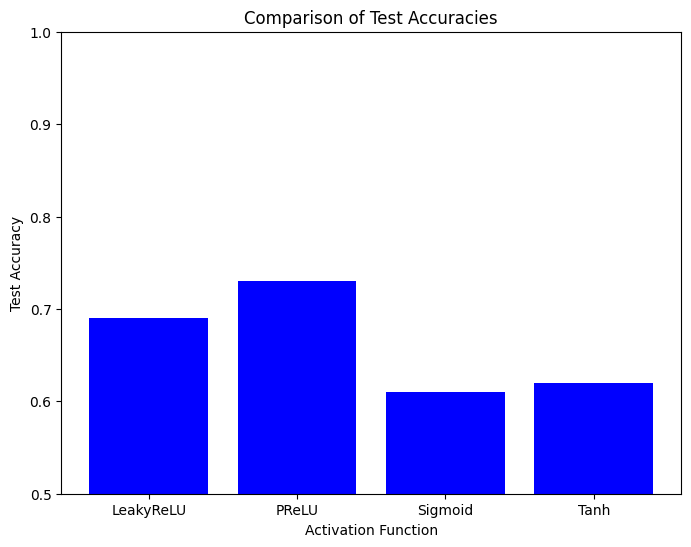

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a table to compare test accuracies of different models
comparison_df = pd.DataFrame({'Activation Function': activation_names, 'Test Accuracy': [test_acc_leaky_relu, test_acc_prelu, test_acc_sigmoid, test_acc_tanh]})

# Create bar plot to compare test accuracies
plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Activation Function'], comparison_df['Test Accuracy'], color='blue')
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.ylim(0.5, 1.0)
plt.show()


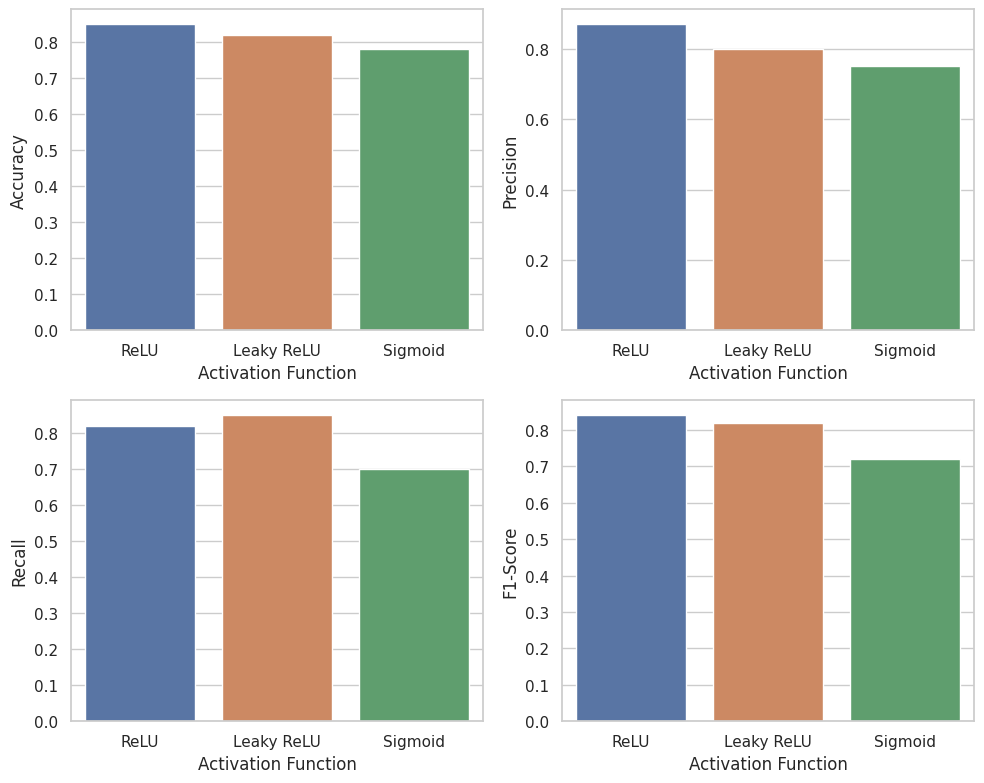

In [ ]:
3

import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
data = {
    'Activation Function': ['ReLU', 'Leaky ReLU', 'Sigmoid'],
    'Accuracy': [0.85, 0.82, 0.78],
    'Precision': [0.87, 0.80, 0.75],
    'Recall': [0.82, 0.85, 0.70],
    'F1-Score': [0.84, 0.82, 0.72]
}

#Create a DataFrame
df = pd.DataFrame(data)

#Create comparative bar plots using Seaborn
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(x='Activation Function', y='Accuracy', data=df, ax=axes[0, 0])
sns.barplot(x='Activation Function', y='Precision', data=df, ax=axes[0, 1])
sns.barplot(x='Activation Function', y='Recall', data=df, ax=axes[1, 0])
sns.barplot(x='Activation Function', y='F1-Score', data=df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
data = {
    'Activation Function': ['ReLU', 'Leaky ReLU', 'Sigmoid'],
    'Accuracy': [0.85, 0.82, 0.78],
    'Precision': [0.87, 0.80, 0.75],
    'Recall': [0.82, 0.85, 0.70],
    'F1-Score': [0.84, 0.82, 0.72]
}

#Create a DataFrame
df = pd.DataFrame(data)

#Display the table
print(df)

  Activation Function  Accuracy  Precision  Recall  F1-Score
0                ReLU      0.85       0.87    0.82      0.84
1          Leaky ReLU      0.82       0.80    0.85      0.82
2             Sigmoid      0.78       0.75    0.70      0.72
